In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Q1) Delivery_time -> Predict delivery time using sorting time.

## Given,
Independent Variable = Sorting Time.  
Dependent Variable = Delivery Time.

In [2]:
Data1 = pd.read_csv('delivery_time.csv')
Data1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
Data1 = Data1.rename(columns = {'Delivery Time':'Delivery_Time' , 'Sorting Time':'Sorting_Time'})
Data1.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
Data1.tail()

,Delivery_Time,Sorting_Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [5]:
Data1.shape

(21, 2)

In [6]:
Data1.duplicated().sum()

0

In [7]:
Data1.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [8]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
Data1.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
Data1.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

In [11]:
plt.rcParams['figure.figsize'] = (5,3)

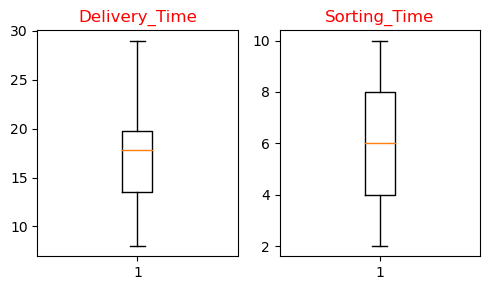

In [12]:
plt.subplot(1,2,1)
plt.boxplot(Data1['Delivery_Time']);
plt.title('Delivery_Time', color = 'r')
plt.subplot(1,2,2)
plt.boxplot(Data1['Sorting_Time']);
plt.title('Sorting_Time', color = 'r')
plt.tight_layout()

## EDA
- No NA/missing values are present in the dataset
- No outliers are present 
- Data types are correct
- No duplicate entries

In [13]:
Data1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


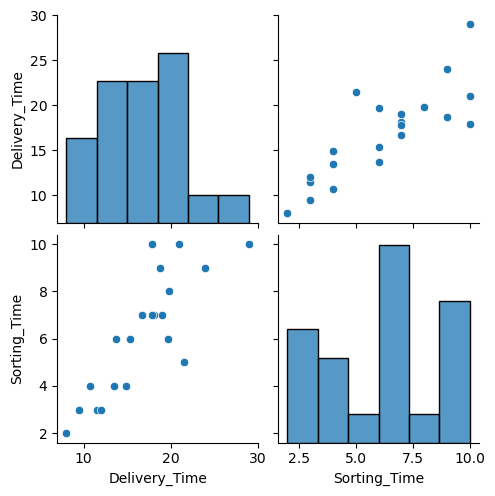

In [14]:
sn.pairplot(Data1);

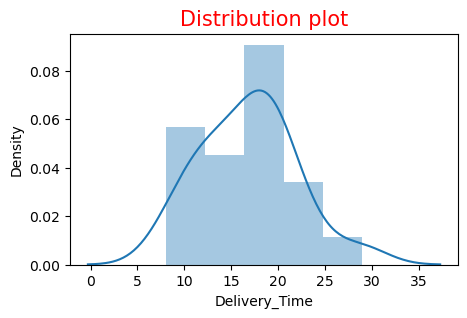

In [15]:
sn.distplot(Data1['Delivery_Time']);
plt.title('Distribution plot', color='red', size=15);

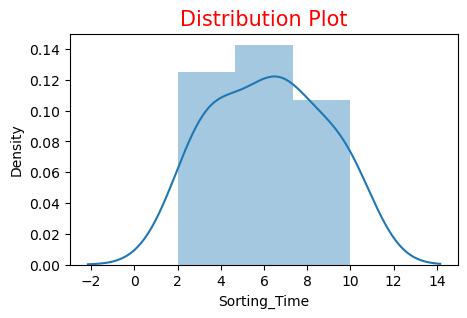

In [16]:
sn.distplot(Data1['Sorting_Time']);
plt.title('Distribution Plot', color='red', size=15);

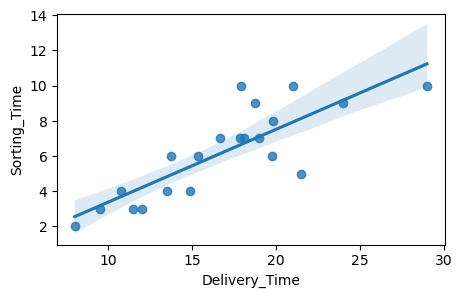

In [17]:
sn.regplot(x='Delivery_Time',y='Sorting_Time',data=Data1);

## Model Building (Without Transformation)

In [18]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time", data = Data1).fit()

In [19]:
round(model.params, 3)

Intercept       6.583
Sorting_Time    1.649
dtype: float64

In [20]:
# t-values & P-values
print('t-values ', '\n', model.tvalues)
print('p-values ', '\n', model.pvalues)

t-values  
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64
p-values  
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


### R Squared value

In [21]:
# R Squared Value
print('R-Squared = ', round(model.rsquared,3))
print('Adjusted R-Squared = ', round(model.rsquared_adj,3))

R-Squared =  0.682
Adjusted R-Squared =  0.666


In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        19:03:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Prediction of delivery time using sorting time

In [23]:
Predicted = pd.DataFrame()
Predicted['Sorting_Time'] = Data1['Sorting_Time']
Predicted['Delivery_Time'] = Data1['Delivery_Time']
Predicted['Predicted_Delivery_Time'] = model.predict(Predicted['Sorting_Time'])
Predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [24]:
Data1['Sorting_Time'].agg(['min','max'])

min     2
max    10
Name: Sorting_Time, dtype: int64

In [25]:
# Calculate prediction of delivery time for below Sorting time.
#Ex.- 4,6,8,3,7.

In [26]:
Delivery_pred = pd.DataFrame()
Delivery_pred['Sorting_Time'] = [4,6,8,3,7,5]
Delivery_pred['Predicted_Delivery_Time'] = round(model.predict(Delivery_pred['Sorting_Time']),3)
Delivery_pred

,Sorting_Time,Predicted_Delivery_Time
0,4,13.179
1,6,16.477
2,8,19.775
3,3,11.530
4,7,18.126
5,5,14.828


### Here values of R-squared and Adj. R-squared are less, so we can use transformation on data to increase those values and get some more accuracy in predictions.

## Transformations:-

## 1) Square Root Transformation:-

- As we can see above our data is not normally distributed so we can applying sqrt transformation on given data to get a normal distribution and remove skewness.

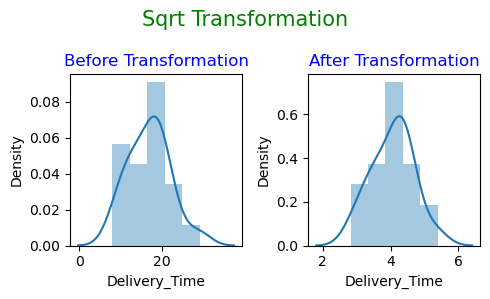

In [27]:
plt.subplots(1,2)
plt.suptitle('Sqrt Transformation', color='g', size=15)
plt.subplot(1,2,1)
plt.title('Before Transformation', color='b')
sn.distplot(Data1['Delivery_Time'])
plt.subplot(1,2,2)
plt.title('After Transformation', color='b')
sn.distplot(np.sqrt(Data1['Delivery_Time']))
plt.tight_layout()

### Model building using square root transformation

In [28]:
import statsmodels.formula.api as smf
model_1 = smf.ols("(np.sqrt(Data1['Delivery_Time']))~(np.sqrt(Data1['Sorting_Time']))", data=Data1).fit()

In [29]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     np.sqrt(Data1['Delivery_Time'])   R-squared:                       0.729
Model:                                         OLS   Adj. R-squared:                  0.715
Method:                              Least Squares   F-statistic:                     51.16
Date:                             Wed, 07 Dec 2022   Prob (F-statistic):           8.48e-07
Time:                                     19:03:25   Log-Likelihood:                -5.7320
No. Observations:                               21   AIC:                             15.46
Df Residuals:                                   19   BIC:                             17.55
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Data1['Sorting_Time'])     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2) Cube Root Transformation

As we can see above our data is not normally distributed so we can applying sqrt transformation on given data to get a normal distribution and remove skewness.

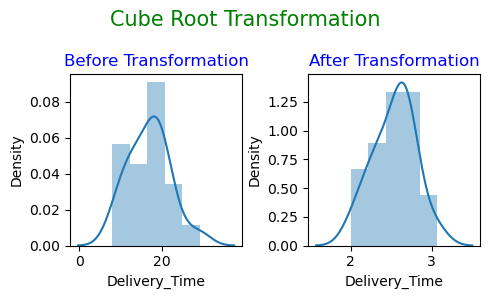

In [30]:
plt.subplots(1,2)
plt.suptitle('Cube Root Transformation', color='g', size=15)
plt.subplot(1,2,1)
sn.distplot(Data1['Delivery_Time'])
plt.title('Before Transformation', color='b')
plt.subplot(1,2,2)
sn.distplot(np.cbrt(Data1['Delivery_Time']))
plt.title('After Transformation', color='b')
plt.tight_layout()

### Model building using cube root transformation

In [31]:
import statsmodels.formula.api as smf
model_2 = smf.ols("(np.cbrt(Data1['Delivery_Time']))~(np.cbrt(Data1['Sorting_Time']))", data=Data1).fit()

In [32]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     np.cbrt(Data1['Delivery_Time'])   R-squared:                       0.744
Model:                                         OLS   Adj. R-squared:                  0.731
Method:                              Least Squares   F-statistic:                     55.25
Date:                             Wed, 07 Dec 2022   Prob (F-statistic):           4.90e-07
Time:                                     19:03:26   Log-Likelihood:                 13.035
No. Observations:                               21   AIC:                            -22.07
Df Residuals:                                   19   BIC:                            -19.98
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Data1['Sorting_Time'])     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3) Log Transformation

- As we can see above our data is not normally distributed so we can applying log transformation on given data to get a normal distribution and remove skewness.

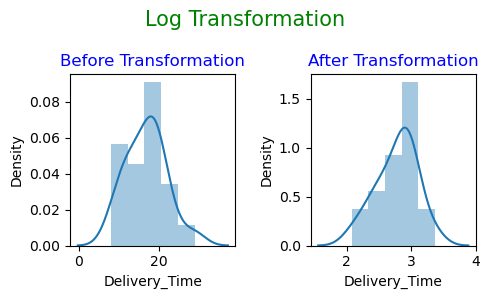

In [33]:
plt.subplots(1,2)
plt.suptitle('Log Transformation', color = 'g', size=15)
plt.subplot(1,2,1)
plt.title('Before Transformation', color='b')
sn.distplot(Data1['Delivery_Time'])
plt.subplot(1,2,2)
plt.title('After Transformation', color='b')
sn.distplot(np.log(Data1['Delivery_Time']))
plt.tight_layout()

## Model building using log transformation

In [34]:
import statsmodels.formula.api as smf
model_3 = smf.ols("(np.log(Data1['Delivery_Time']))~(np.log(Data1['Sorting_Time']))", data = Data1).fit()

In [35]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     np.log(Data1['Delivery_Time'])   R-squared:                       0.772
Model:                                        OLS   Adj. R-squared:                  0.760
Method:                             Least Squares   F-statistic:                     64.39
Date:                            Wed, 07 Dec 2022   Prob (F-statistic):           1.60e-07
Time:                                    19:03:26   Log-Likelihood:                 10.291
No. Observations:                              21   AIC:                            -16.58
Df Residuals:                                  19   BIC:                            -14.49
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Data1['Sorting_Time'])     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model_3.params

Intercept                        1.741987
np.log(Data1['Sorting_Time'])    0.597522
dtype: float64

In [37]:
print('R-Squared = ', round(model_3.rsquared, 2))
print('Adjusted R-Squared = ', round(model_3.rsquared_adj,2))

R-Squared =  0.77
Adjusted R-Squared =  0.76


### As we can see that the values of R-Squared and Adjested R-Squared are higher in log transformation, so we can use log transformation for predictions.

In [38]:
Predicted1 = pd.DataFrame()
Predicted1['Sorting_Time'] = Data1['Sorting_Time']
Predicted1['Delivery_Time'] = Data1['Delivery_Time']
Predicted1['Predicted_Delivery_Time'] = round(np.exp(model_3.predict(Predicted['Sorting_Time'])), 2)
Predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.60
1,4,13.50,13.07
2,6,19.75,16.65
3,9,24.00,21.22
4,10,29.00,22.60
5,6,15.35,16.65
6,7,19.00,18.26
7,3,9.50,11.01
8,10,17.90,22.60
9,9,18.75,21.22


In [39]:
# Calculate prediction of delivery time for below Sorting time(Using Log Transformation).
#Ex.- 4,6,8,3,7,5.

In [40]:
Predicted2 = pd.DataFrame()
Predicted2['Sorting_Time'] = [4,6,8,3,7,5]
Predicted2['Delivery_Time'] = [13.50,15.35,19.83,12.03,17.83,21.50]
Predicted2

,Sorting_Time,Delivery_Time
0,4,13.50
1,6,15.35
2,8,19.83
3,3,12.03
4,7,17.83
5,5,21.50


In [41]:
model_4 = smf.ols("(np.log(Predicted2['Delivery_Time']))~(np.log(Predicted2['Sorting_Time']))", data=Predicted2).fit()

In [42]:
Predicted2['Predicted_Delivery_Time'] = round(np.exp(model_4.predict(Predicted2['Sorting_Time'])), 2)
Predicted2

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,4,13.50,14.44
1,6,15.35,17.42
2,8,19.83,19.89
3,3,12.03,12.65
4,7,17.83,18.70
5,5,21.50,16.01


## =======================================================================

## Q2) Salary_hike -> Build a prediction model for Salary hike.

## Given,
Independent Variable = Years Of Experience.  
Dependent Variable = Salary hike.

In [43]:
Salary_Data = pd.read_csv('Salary_Data.csv')
Salary_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [44]:
Salary_Data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [45]:
Salary_Data.shape

(30, 2)

In [46]:
Salary_Data.duplicated().sum()

0

In [47]:
Salary_Data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [48]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [49]:
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


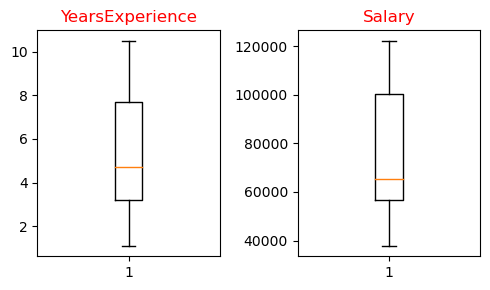

In [50]:
plt.subplot(1,2,1)
plt.boxplot(Salary_Data['YearsExperience']);
plt.title('YearsExperience', color ='r')
plt.subplot(1,2,2)
plt.boxplot(Salary_Data['Salary']);
plt.title('Salary', color = 'r')
plt.tight_layout()

## EDA
- No NA/Missing values found
- No outliers found
- Datatypes are correct
- NO duplicates found

In [51]:
Salary_Data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


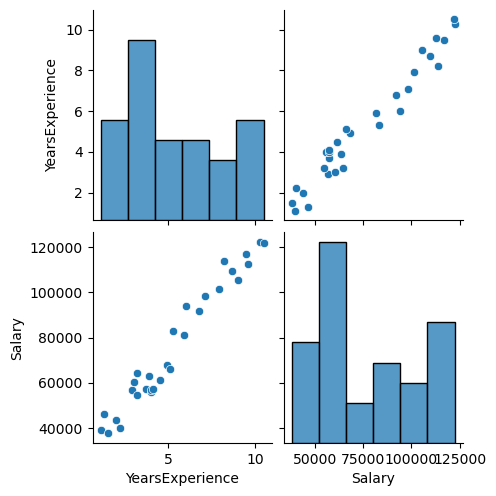

In [52]:
sn.pairplot(Salary_Data);

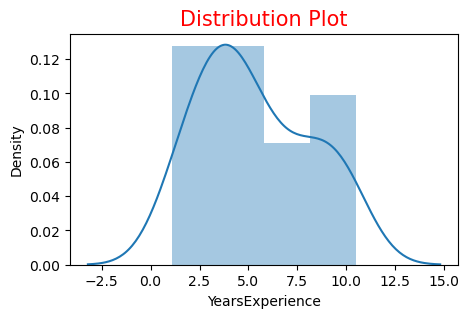

In [53]:
sn.distplot(Salary_Data['YearsExperience']);
plt.title('Distribution Plot', color = 'red', size=15);

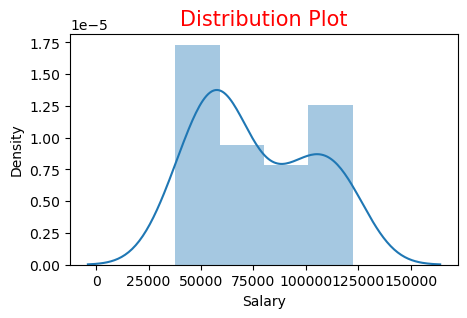

In [54]:
sn.distplot(Salary_Data['Salary']);
plt.title('Distribution Plot', color='red', size=15);

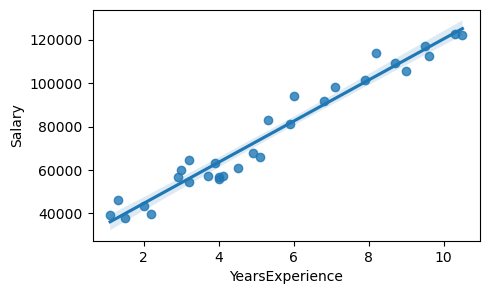

In [55]:
sn.regplot(x= 'YearsExperience', y= 'Salary', data = Salary_Data);

## Model Building (Without Transformation)

In [56]:
import statsmodels.formula.api as smf
Salary_model = smf.ols("Salary~YearsExperience", data = Salary_Data).fit()

In [57]:
round(Salary_model.params, 2)

Intercept          25792.20
YearsExperience     9449.96
dtype: float64

In [58]:
# t-values & p-values
print('t-values', '\n', Salary_model.tvalues)
print('p-values', '\n', Salary_model.pvalues)

t-values 
 Intercept          11.346940
YearsExperience    24.950094
dtype: float64
p-values 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


## R Squared Value

In [59]:
print('R-Squared = ', round(Salary_model.rsquared, 4))
print('Adjusted R_Squared = ', round(Salary_model.rsquared_adj, 4))

R-Squared =  0.957
Adjusted R_Squared =  0.9554


In [60]:
Salary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        19:03:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformations:-

## 1) Log Transformation:-

As we can see above our data is not normally distributed so we can applying log transformation on given data to get a normal distribution and remove skewness.

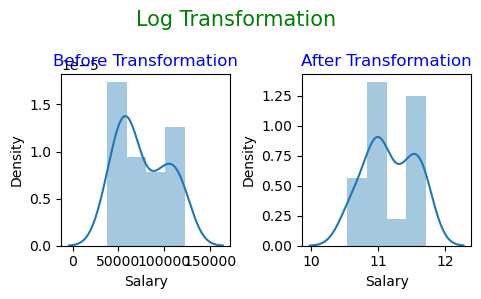

In [61]:
plt.subplots(1,2)
plt.suptitle('Log Transformation', color = 'g', size=15)
plt.subplot(1,2,1)
plt.title('Before Transformation', color='b')
sn.distplot(Salary_Data['Salary'])
plt.subplot(1,2,2)
plt.title('After Transformation', color='b')
sn.distplot(np.log(Salary_Data['Salary']))
plt.tight_layout()

## Model building using log transformation

In [62]:
import statsmodels.formula.api as smf
Salary_model_1 = smf.ols("(np.log(Salary_Data['Salary']))~(np.log(Salary_Data['YearsExperience']))", data = Salary_Data).fit()

In [63]:
Salary_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     np.log(Salary_Data['Salary'])   R-squared:                       0.905
Model:                                       OLS   Adj. R-squared:                  0.902
Method:                            Least Squares   F-statistic:                     267.4
Date:                           Wed, 07 Dec 2022   Prob (F-statistic):           7.40e-16
Time:                                   19:03:27   Log-Likelihood:                 23.209
No. Observations:                             30   AIC:                            -42.42
Df Residuals:                                 28   BIC:                            -39.61
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 10.3280      0.056    184.868      0.000      10.214      10.442
np.log(Salary_Data['YearsExperience'])     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2) Square Root Transformation

As we can see above our data is not normally distributed so we can applying log transformation on given data to get a normal distribution and remove skewness.

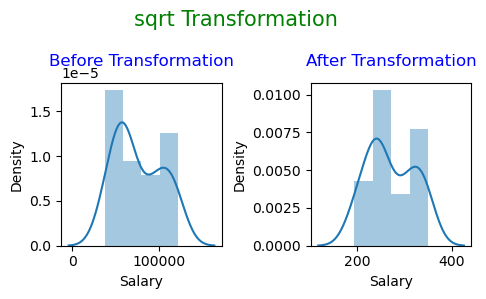

In [64]:
plt.subplots(1,2)
plt.suptitle('sqrt Transformation', color = 'g', size=15)
plt.subplot(1,2,1)
plt.title('Before Transformation', color='b', pad=12)
sn.distplot(Salary_Data['Salary'])
plt.subplot(1,2,2)
plt.title('After Transformation', color='b', pad=12)
sn.distplot(np.sqrt(Salary_Data['Salary']))
plt.tight_layout()

## Model building using square root transformation

In [65]:
import statsmodels.formula.api as smf
Salary_model_2 = smf.ols("(np.sqrt(Salary_Data['Salary']))~(np.sqrt(Salary_Data['YearsExperience']))", data = Salary_Data).fit()

In [66]:
Salary_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     np.sqrt(Salary_Data['Salary'])   R-squared:                       0.942
Model:                                        OLS   Adj. R-squared:                  0.940
Method:                             Least Squares   F-statistic:                     454.3
Date:                            Wed, 07 Dec 2022   Prob (F-statistic):           7.58e-19
Time:                                    19:03:27   Log-Likelihood:                -116.52
No. Observations:                              30   AIC:                             237.0
Df Residuals:                                  28   BIC:                             239.8
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(Salary_Data['YearsExperience'])    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3) Cube Root Transformation

As we can see above our data is not normally distributed so we can applying log transformation on given data to get a normal distribution and remove skewness.

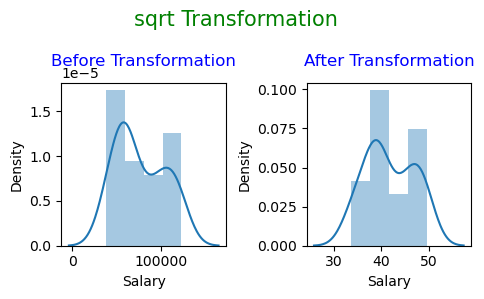

In [67]:
plt.subplots(1,2)
plt.suptitle('sqrt Transformation', color = 'g', size=15)
plt.subplot(1,2,1)
plt.title('Before Transformation', color='b', pad=12)
sn.distplot(Salary_Data['Salary'])
plt.subplot(1,2,2)
plt.title('After Transformation', color='b', pad=12)
sn.distplot(np.cbrt(Salary_Data['Salary']))
plt.tight_layout()

## Model building using cube root transformation

In [68]:
import statsmodels.formula.api as smf
Salary_model_3 = smf.ols("(np.cbrt(Salary_Data['Salary']))~(np.cbrt(Salary_Data['YearsExperience']))", data = Salary_Data).fit()

In [69]:
Salary_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     np.cbrt(Salary_Data['Salary'])   R-squared:                       0.932
Model:                                        OLS   Adj. R-squared:                  0.930
Method:                             Least Squares   F-statistic:                     386.5
Date:                            Wed, 07 Dec 2022   Prob (F-statistic):           6.37e-18
Time:                                    19:03:28   Log-Likelihood:                -50.589
No. Observations:                              30   AIC:                             105.2
Df Residuals:                                  28   BIC:                             108.0
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(Salary_Data['YearsExperience'])    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Here in 1st Salary_model (without transformation) we get the higher values of R-Squared and Adjusted R-Squared, so we use this model for predictions.

## Prediction of salary hike based on years of experience.

In [72]:
Predicted3 = pd.DataFrame()
Predicted3['YearsExperience'] = Salary_Data['YearsExperience']
Predicted3['Salary'] = Salary_Data['Salary']
Predicted3['Predicted_Salary'] = round(Salary_model.predict(Predicted3['YearsExperience']), 2)
Predicted3

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,36187.16
1,1.3,46205.0,38077.15
2,1.5,37731.0,39967.14
3,2.0,43525.0,44692.12
4,2.2,39891.0,46582.12
5,2.9,56642.0,53197.09
6,3.0,60150.0,54142.09
7,3.2,54445.0,56032.08
8,3.2,64445.0,56032.08
9,3.7,57189.0,60757.06


In [73]:
Salary_Data['YearsExperience'].agg(['min','max'])

min     1.1
max    10.5
Name: YearsExperience, dtype: float64

In [74]:
# prediction salary hike for below years of experience
#Ex.- 1.8,2.9,3.5,4.8,7,9.5.

In [75]:
Experience = pd.DataFrame()
Experience['YearsExperience'] = [1.8,2.9,3,4.8,5,7,9.5]
Experience['Predicted_Salary'] = round(Salary_model.predict(Experience['YearsExperience']), 2)
Experience

,YearsExperience,Predicted_Salary
0,1.8,42802.13
1,2.9,53197.09
2,3.0,54142.09
3,4.8,71152.02
4,5.0,73042.01
5,7.0,91941.94
6,9.5,115566.84


## =======================================================================